# Out of Boundary Paths

There is an `m x n` grid with a ball. The ball is initially at the position `[startRow, startColumn]`. You are allowed to move the ball to one of the four adjacent cells in the grid (possibly out of the grid crossing the grid boundary). You can apply at most `maxMove` moves to the ball.

Given the five integers `m`, `n`, `maxMove`, `startRow`, `startColumn`, return the number of paths to move the ball out of the grid boundary. Since the answer can be very large, return it modulo `10^9 + 7`.

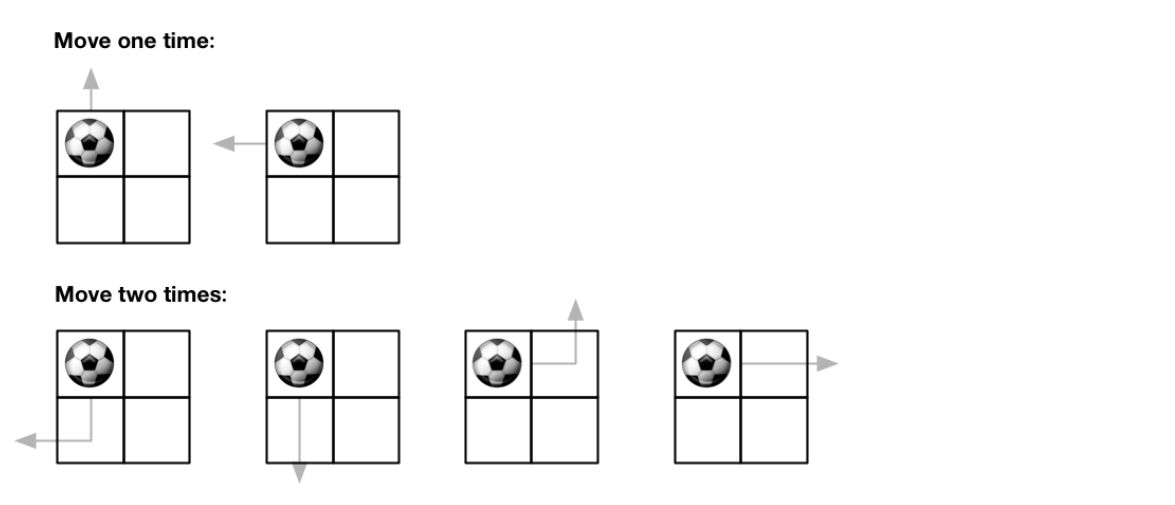

Example 1:

```
Input: m = 2, n = 2, maxMove = 2, startRow = 0, startColumn = 0
Output: 6
```

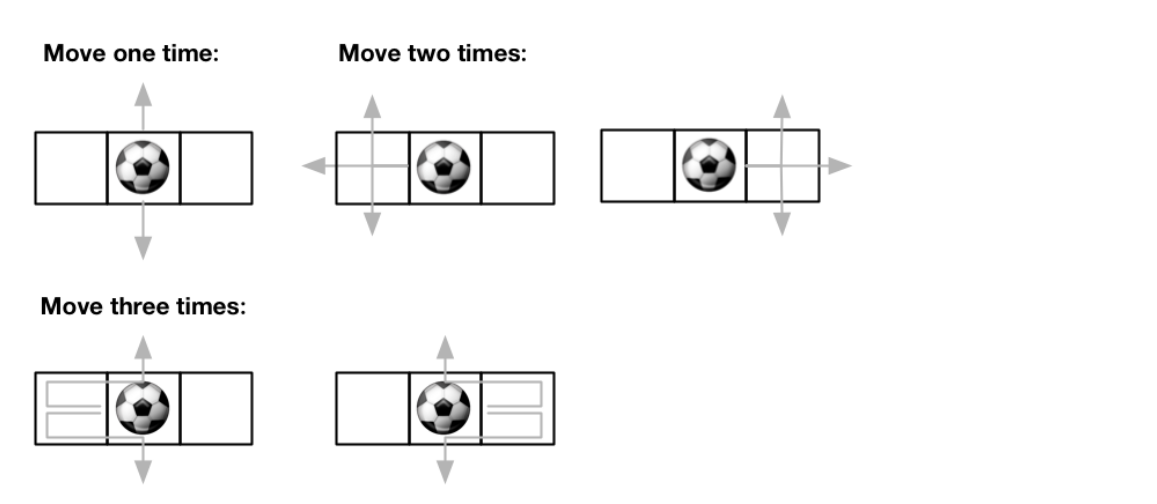

Example 2:

```
Input: m = 1, n = 3, maxMove = 3, startRow = 0, startColumn = 1
Output: 12
```

## Solution 1

In [1]:
from functools import cache

class Solution:
    # time = O(m*n*maxMoves)
    # space = O(m*n*maxMoves)
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        MOD = int(1e9+7)
        dirs = [(1,0),(0,1),(-1,0),(0,-1)]
        
        @cache
        def dfs(row, col, moves):
            if row < 0 or row >= m or col < 0 or col >= n:
                return 1
            if moves == 0:
                return 0
            ret = 0
            for dr, dc in dirs:
                ret += dfs(row+dr, col+dc, moves-1)
                ret %= MOD
            return ret
        
        return dfs(startRow, startColumn, maxMove)

In [2]:
m = 2
n = 2
maxMove = 2
startRow = 0
startColumn = 0

expected = 6

output =Solution().findPaths(m, n, maxMove, startRow, startColumn)
print(output)

assert output == expected


6


In [3]:
m = 1
n = 3
maxMove = 3
startRow = 0
startColumn = 1

expected = 12

output =Solution().findPaths(m, n, maxMove, startRow, startColumn)
print(output)

assert output == expected


12


## Solution 2

In [4]:
from functools import cache

class Solution:
    # time = O(m*n*maxMoves)
    # space = O(m*n)
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        mod = 10**9 + 7
        dp = [[0 for _ in range(n)] for _ in range(m)]
        dp[startRow][startColumn] = 1
        count = 0
        for move in range(maxMove):
            temp = [[0 for _ in range(n)] for _ in range(m)]
            for i in range(m):
                for j in range(n):
                    if i == m - 1: count += dp[i][j] % mod
                    if j == n - 1: count += dp[i][j] % mod
                    if i == 0: count += dp[i][j] % mod
                    if j == 0: count += dp[i][j] % mod
                    
                    temp[i][j] = ((dp[i - 1][j] if i > 0 else 0) + (dp[i + 1][j] if i < m - 1 else 0) + \
                                 (dp[i][j - 1] if j > 0 else 0) + (dp[i][j + 1] if j < n - 1 else 0)) % mod
            
            dp = temp
        
        return count % mod

In [5]:
m = 2
n = 2
maxMove = 2
startRow = 0
startColumn = 0

expected = 6

output =Solution().findPaths(m, n, maxMove, startRow, startColumn)
print(output)

assert output == expected


6


In [6]:
m = 1
n = 3
maxMove = 3
startRow = 0
startColumn = 1

expected = 12

output =Solution().findPaths(m, n, maxMove, startRow, startColumn)
print(output)

assert output == expected


12
